## __Estudos com python e Excel usando PANDAS__

Este arquivo se trata de um estudo e técnicas usadas na integração de python e excel.

### O que é PANDAS
A biblioteca PANDAS faz essa integração com python e base de dados em CSV ou excel. O mais interessante é que podemos lidar com muitas informações, ou seja com planilhas enormes com grande quantidade de dados.
Geralmente fazemos a seguinte importação e apelidamos de __pd__

In [32]:
# Importando a biblioteca
import pandas as pd


### Lendo um arquivo CSV

Para lidar com os dados de um __CSV__ precisamos trazer ele pro nosso código python. Fazemos isso com a função __read_csv__:

```
dataframe = pd.read_csv('arquivo_com_extensão.csv')
```
Lembrando que o arquivo deve estar na mesma pasta do programa, ou deverá ser mostrado o caminho.
Nosso arquivo será armazenado o dataframe em variáveis.

### Parâmetros

No arquivo exemplo temos uma separação por __;__ nesse caso devemos colocar o parâmetro __sep=';'__

### Buscando caminho do arquivo

```
dataframe = pd.read_csv(r'caminhao/arquivo_com_extensão.csv')
```

In [33]:
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep=';')

produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')

produtos_df

vendas_df[:8]

display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


## Mas o que é um dataframe?

Como se fosse uma tabela:
* Colunas funcionam como chaves de dicionário
* Linhas funcionam "como listas"

Exemplo
```
dataframe[['coluna_x']] Mostra dados somente da 'coluna_x'
dataframe[2] Mostra a linha 2
dataframe[:3] Exibe da linha 0 até a linha 3 da tabela
dataframe[['coluna_x', 'coluna_y', 'coluna_z']] Cria um novo dataframe com as colunas mencionadas
dataframe['coluna_x'][5] Pega o 5° item da 'coluna_x'
```

### Exemplificando

In [34]:
vendas_df[['Numero da Venda']]

vendas_df[['Numero da Venda', 'Data da Venda', 'Data do Envio']]

vendas_df[:0]

vendas_df['Numero da Venda'][7]

8

## Carregar informações da base de dados

Muitas vezes precisamos filtrar as colunas para fazer algum tratamento de dados, ou ainda ter conhecimento do que cada coluna informa. Pra isso temos o comando de carregar informações.
```
dataframe.info()
```
As informações carregadas são as seguintes:
* Número de colunas
* Informação do cabeçalho
* Tipo de dados
* Quantidade de linhas
* Tamanho em memória
* Quantidade de informações vazias em cada coluna

In [35]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


## Criando novos dataframe com base de um dataframe

Podemos criar diversos dataframes a partir de um dataframe principal, posteriormente manipular informações com dataframes separados.

```
clientes_df = empresa_df[['Clientes']]
produtos_df = empresa_df[['Produtos']]
```
Dessa maneira fica mais simples tratar os dados e cruzar os dados para obter alguma informação específica.

In [36]:
lista_cliente_df = vendas_df[['ID Cliente']]

lista_cliente_df

,ID Cliente
0,6825
1,18469
2,19730
3,29326
4,22617
...,...
980637,10353
980638,31750
980639,12003
980640,25550


## Comparar tratar e mesclar dataframes

Para uma análise mais intuitiva, precisamos modificar o nome das colunas, sendo assim mais fácil de tratar posteriormente.\
__Observação importante:__ As vezes precisamos mudar o parâmetro __encoding__, eles devem ser testados e são o seguintes:
* 'Latin1'
* 'ISO-8859-1'
* 'utf-8'
* 'cp1252'

__Outra observação:__ Para exibir diversos dataframe usamos o comando
```display(dataframe)```

In [37]:
# Importando base de dados

produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv('Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep=';')


# Exibindo os dataframes

display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


## Retirando colunas inúteis

Por vezes precisamos retirar informações que não iremos utilizar, algumas colunas podem atrapalhar as análises, sendo assim devem ser eliminadas pelo comando ```dataframe = dataframe.drop(['coluna_1', 'coluna_2'])```.\
Assim temos uma base mais limpa.
__Observação importante:__ No comando ```.drop``` existe um parâmetro chamado __axis__, esse parâmetro demosntra se será deletado coluna ou linha. Para deletar coluna é usado __1__, para linha __0__.\
Mas na maioria dos casos usamos a redefinição escolhendo somente as colunas que serão usadas.\
```dataframe = dataframe[['coluna_1', 'coluna_5']]```

In [38]:
# Selecionando somente colunas importantes das base de dados

clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


## Juntando dataframes

Para juntar dataframes num só usamos o comando ```.merge```\
'''novo_dataframe = dataframe_1.merge(dataframe_2, on='coluna')'''\
__Observação:___ O __merge__ precisa de colunas com o mesmo nome pra funcionar ou a coluna deve ser renomeada para fazer corretamente. Pra renomear basta usa o comando ```.rename```\
```dataframe = dataframe.rename(columns={'coluna_1': 'nova_coluna'})```

In [39]:
# Juntando os DF de vendas com produtos
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

# Exibindo vendas_df
display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


## Renomeando a coluna Email

A coluna email está muito superficial como um nome de coluna, pois é o email do cliente. Nesse sentido faz-se necessário usar o comando ```.rename``` pra renomear a mesma.

In [49]:
# Renomeando Email para Email do Cliente
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})

display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


## Analisando dados e visualização de gráficos com Pandas

O __PANDAS__ usa a biblioteca ```matplotlib```, mas existem outras bibliotecas que também fazem gráficos com outros tipos de design. Mas pra análise já está ótimo o que temos disponível com o __PANDAS__, vamos agora analisar os dados.

In [52]:
# Visualizando o dataframe usado no exemplo

display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


# Perguntas para fazer a análise

Pra fazer uma análise precisamos de perguntas, pois através delas é que vamos analisar, afinal de contas é necessário saber qual informação deseja extrair de uma base de dados.

## Qual cliente comprou mais vezes?

Para responder a essa pergunta usaremos os seguintes métodos:
* ```.values_counts()``` para conar quantas vezes cada valor aparece no __dataframe__
* ```.plot()``` para exibir um gráfico

### Dicas de plotagem de gráfico

Segue alguns parâmetros para melhorar seu gráfico:
* ```figsize=(width, height)``` (largura e altura)
* ```yticks=range(início, final, passo)``` (valor inicial, valor final, valor de uma linha a outra)


karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<Axes: >

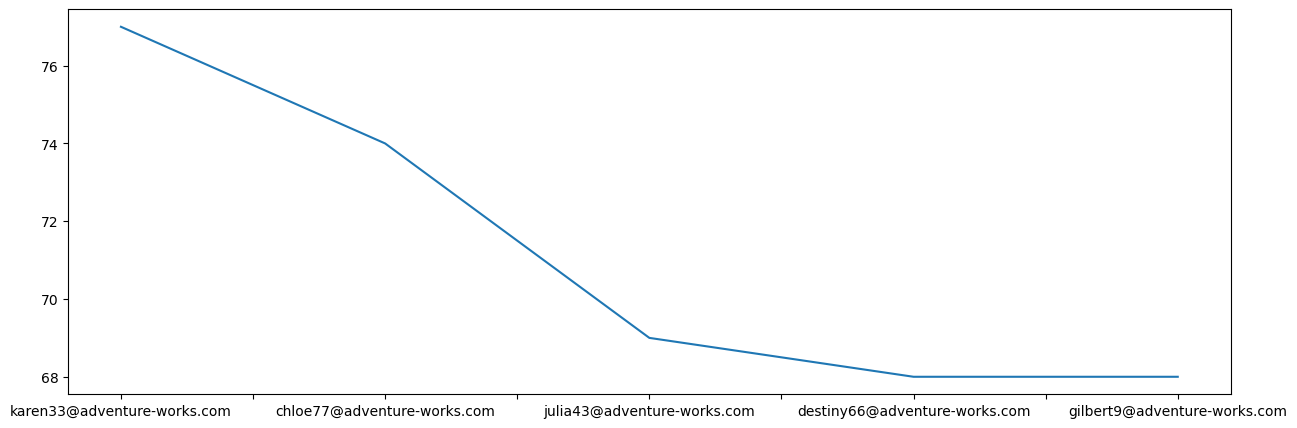

In [67]:
# Criando uma variável para coluna
freq_clientes = vendas_df['E-mail do Cliente'].value_counts()

display(freq_clientes)

# Plotando um gráfico
freq_clientes[:5].plot(figsize=(15, 5))


## Qual loja que mais vendeu?

A função usada é o ```.groupby()```, ela agrupa o __dataframe__ de acordo com as informações desejadas (somando a quantidade de vendas por exemplo)
